In [2]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.linear_model import LinearRegression
#%matplotlib inline
df = pandas.read_csv("drug.csv")
df3 =  pandas.read_csv("DoctorData.csv")

In [3]:
df2 = df.tail(100)
df2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
100,31,M,HIGH,NORMAL,11.871,drugA
101,45,F,HIGH,HIGH,12.854,drugA
102,28,F,LOW,HIGH,13.127,drugC
103,56,M,NORMAL,HIGH,8.966,drugX
104,22,M,HIGH,NORMAL,28.294,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 100 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          100 non-null    int64  
 1   Sex          100 non-null    object 
 2   BP           100 non-null    object 
 3   Cholesterol  100 non-null    object 
 4   Na_to_K      100 non-null    float64
 5   Drug         100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [5]:
#Select the columns we wish to use and assign them to a Pandas Dataframe

#Set features we want to use to a DF
features1 = ['Age','Sex', 'BP', 'Cholesterol', 'Na_to_K']

# we can also do the following
# features = shows.columns[1:] if we have lots of feature columns


# Assign this to our target DF feateres
X = df2[features1]

#Display DF to check all is as expected.
X

,Age,Sex,BP,Cholesterol,Na_to_K
100,31,M,HIGH,NORMAL,11.871
101,45,F,HIGH,HIGH,12.854
102,28,F,LOW,HIGH,13.127
103,56,M,NORMAL,HIGH,8.966
104,22,M,HIGH,NORMAL,28.294
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [6]:
y = df2['Drug']
y

100    drugA
101    drugA
102    drugC
103    drugX
104    drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 100, dtype: object

In [7]:
d = {'F': 0, 'M': 1,}
df2['Sex'] = df2['Sex'].map(d)
BP = {'HIGH': 0, 'LOW': 1, 'NORMAL':2}
df2['BP'] = df2['BP'].map(BP)
Cholesterol = {'HIGH': 0, 'NORMAL': 1,}
df2['Cholesterol'] = df2['Cholesterol'].map(Cholesterol)
Drug = {'drugY': 4, 'drugX': 3, 'drugC' : 2, 'drugA' : 0, 'drugB' : 1}
df2['Drug'] = df2['Drug'].map(Drug)

print(df2)

     Age  Sex  BP  Cholesterol  Na_to_K  Drug
100   31    1   0            1   11.871     0
101   45    0   0            0   12.854     0
102   28    0   1            0   13.127     2
103   56    1   2            0    8.966     3
104   22    1   0            1   28.294     4
..   ...  ...  ..          ...      ...   ...
195   56    0   1            0   11.567     2
196   16    1   1            0   12.006     2
197   52    1   2            0    9.894     3
198   23    1   2            1   14.020     3
199   40    0   1            1   11.349     3

[100 rows x 6 columns]


C:\Users\aiden\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\aiden\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\aiden\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [8]:
features = ['Age', 'Sex', 'BP', 'Na_to_K','Cholesterol' ]

X = df2[features]
y = df2['Drug']
xnp = X.to_numpy()
print(X)
print(y)

     Age  Sex  BP  Na_to_K  Cholesterol
100   31    1   0   11.871            1
101   45    0   0   12.854            0
102   28    0   1   13.127            0
103   56    1   2    8.966            0
104   22    1   0   28.294            1
..   ...  ...  ..      ...          ...
195   56    0   1   11.567            0
196   16    1   1   12.006            0
197   52    1   2    9.894            0
198   23    1   2   14.020            1
199   40    0   1   11.349            1

[100 rows x 5 columns]
100    0
101    0
102    2
103    3
104    4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 100, dtype: int64


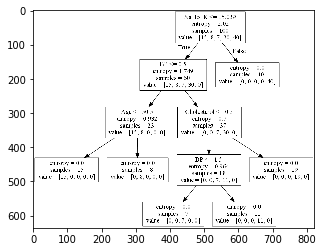

In [9]:
dtree = DecisionTreeClassifier(criterion = 'entropy')
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('doctordecisiontree.png')

img=pltimg.imread('doctordecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [11]:
print(dtree.predict([[23, 1, 2, 1, 25.355]]))
myData = dtree.predict([[23, 1, 2, 1, 25.355]])
# Dislay answer
myData

theDecision = myData[0]

if theDecision == 0:
    print("You have been assigned Drug A")
elif theDecision == 1:
    print("You have been assigned Drug B")
elif theDecision == 2:
    print("You have been assigned Drug C")
elif theDecision == 3:
    print("You have been assigned Drug X")
elif theDecision == 4:
    print("You have been assigned Drug Y")


[3]
You have been assigned Drug X


My model compared to Will's model is not very different. We got similar results when putting in the data to test the model but because our trees were slightly different, our prediction models got different results for some of the data. 

In [12]:
age = int(input("Enter the age of the patient: "))
sex = int(input("Enter the sex of the patient with a number (Female = 1, Male = 0): "))
BP = int(input("Enter the BP of the patient with a number (High = 2, Normal = 1, Low = 0): "))
Chol = int(input("Enter the cholesterol of the patient with a number (High = 1, Normal = 0): "))
Na_K = float(input("Enter the sodium/potassium: "))

print(dtree.predict([[age, sex, BP, Chol, Na_K]]))
myData1 = dtree.predict([[age, sex, BP, Chol, Na_K]])
# Dislay answer
myData1

theDecision = myData1[0]

if theDecision == 0:
    print("You have been assigned Drug A")
elif theDecision == 1:
    print("You have been assigned Drug B")
elif theDecision == 2:
    print("You have been assigned Drug C")
elif theDecision == 3:
    print("You have been assigned Drug X")
elif theDecision == 4:
    print("You have been assigned Drug Y")

Enter the age of the patient: 2
Enter the sex of the patient with a number (Female = 1, Male = 0): 4
Enter the BP of the patient with a number (High = 2, Normal = 1, Low = 0): 5
Enter the cholesterol of the patient with a number (High = 1, Normal = 0): 2
Enter the sodium/potassium: 1
[3]
You have been assigned Drug X


The data i created was tested against the data given in the assignment and found out the data is 80% correct. the reason why is most likley because my data has different numbers set of the drugs and the data most likley has different data. 

The test and train was not used simply becasue it would nnot give us the infomationt that we need, it was be easier to use 